##### Autocorrelation and Partial autocorrelation: 

After applying the mathematical transformations discussed in the previous section, we will often be left with what is known as a stationary (or weakly stationary) time series, which is characterized by a constant mean E(xt) and correlation that depends only on the time lag between two time steps, but independent of the value of the time step. This covariance is the key in time series analysis and is called <b>autocovariance or autocorrelation</b> when <i>normalized</i> to the range of -1 to 1.

Autocorrelation reflects the degree of linear dependency between the time series at index t and the time series at indices t-h or t+h.
- Positive autocorrelation indicates that the present and future values of the time series move in the same direction.
- Negative values means that present and future values move in the opposite direction. 
- If autocorrelation is close to zero, temporal dependencies within the series may be hard to find.<br>

Because of this property, autocorrelation is useful in predicting the future state of a time series at h time steps ahead.

<b>ACF Plot</b>: Presence of autocorrelation can be identified by plotting the observed values of the autocorrelation function (ACF) for a given time series.

In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
djia_df = pd.read_excel('../Data Files/DJIA_Jan2016_Dec2016.xlsx')

In [3]:
# Change the row indices of the dataframe using the Date column
djia_df.index = djia_df['Date']

In [4]:
djia_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-01-04,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


Text(0,0.5,'Closing Value')

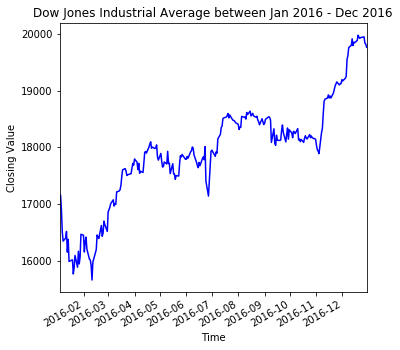

In [5]:
plt.figure(figsize=(5.5, 5.5))
djia_df['Close'].plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value')

In [6]:
lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

In [7]:
pd.Series(djia_acf).describe()

count    31.000000
mean      0.849987
std       0.101862
min       0.660653
25%       0.771158
50%       0.864831
75%       0.933161
max       1.000000
dtype: float64

Text(0,0.5,'Autocorrelation function')

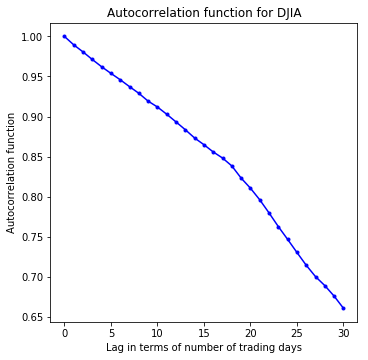

In [8]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(djia_acf, marker='.', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function')

Used `plot_acf` function of `statsmodels.graphics.tsaplots` to compute and plot the autocorrelation at various lags. This function also plots the 95% confidence intervals. Autocorrelation <b>outside these confidence intervals is statistically significant</b> correlation while those which are inside the confidence intervals are due to random noise.

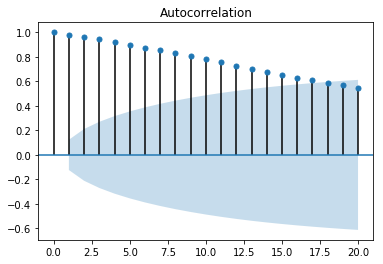

<Figure size 396x396 with 0 Axes>

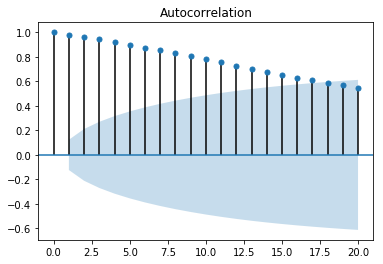

In [9]:
#Plot autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_acf(djia_df['Close'], lags=20)
# plt.savefig('acf.png', format='png', dpi=300)

- Autocorrelation which is a measure of linear dependency between variables x_t and x_(t+h). Autoregressive (AR) models captures this dependency as a linear regression between the x_(t+h) and x_t. 

- However, time series tend to carry information and dependency structures in steps and therefore autocorrelation at lag h is also influenced by the intermediate variables x_t, x_(t+1)...x_(t+h-1). Therefore, autocorrelation is not the correct measure of the mutual correlation between x_t and x_(t+h) in the presence of the intermediate variables. Hence, it would erroneous to choose h in AR models based on autocorrelation.

- <b>Partial autocorrelation</b> solves this problem by measuring the correlation between x_t and x_(t+h) when the influence of the intermediate variables has been removed. Hence partial autocorrelation in time series analysis defines the correlation between x_t and x_(t+h) which is not accounted for by lags t+1 to t+h-1.

```Partial autocorrelation``` helps in identifying the order h of an AR(h) model.

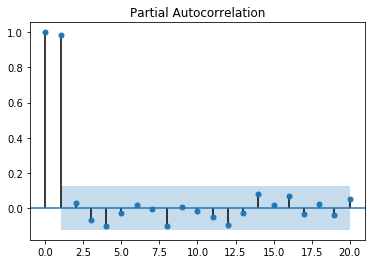

<Figure size 396x396 with 0 Axes>

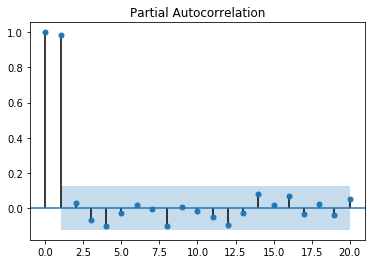

In [10]:
#Plot partial autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_pacf(djia_df['Close'], lags=20)